In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = (20, 15)

measures='../data/raw/measures/'
measures_processed='../data/processed/measures/'

First of all we are going to read all the files and put them in one csv

In [24]:
import glob
measure_files = glob.glob(measures+"*")
dfs = []
for measure_file in measure_files:
    if '.json' in measure_file:
        df = pd.read_json(measure_file, lines=True)
    else:
        df = pd.read_csv(measure_file)
    dfs.append(df)

In [25]:
for df in dfs:
    print(df.columns)

Index(['sensor', 'time', 'value'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'time', 'value'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'value', 'time'], dtype='object')
Index(['sensor', 'time', 'value'], dtype='object')
Index(['sensor', 'time', 'value'], dtype='object')


In [26]:
df = pd.concat(dfs, ignore_index=False, sort=True)
df.to_csv(measures_processed+'measures.csv')

In [27]:
df.head()

,sensor,time,value
0,H-DHT11,2017-12-22T11:22:11Z,31.0
1,H-DHT11,2017-12-22T11:22:16Z,31.0
2,H-DHT11,2017-12-22T11:22:20Z,31.0
3,H-DHT11,2017-12-22T11:22:24Z,31.0
4,H-DHT11,2017-12-22T11:22:28Z,31.0


In [28]:
df.sensor.unique()

array(['H-DHT11', 'H-DHT22', 'H-HTU21', 'P-BMP280', 'P-DM280', 'T-BMP280',
       'T-DHT11', 'T-DHT22', 'T-DM280', 'T-HTU21'], dtype=object)

In [30]:
df.set_index('time', inplace=True)

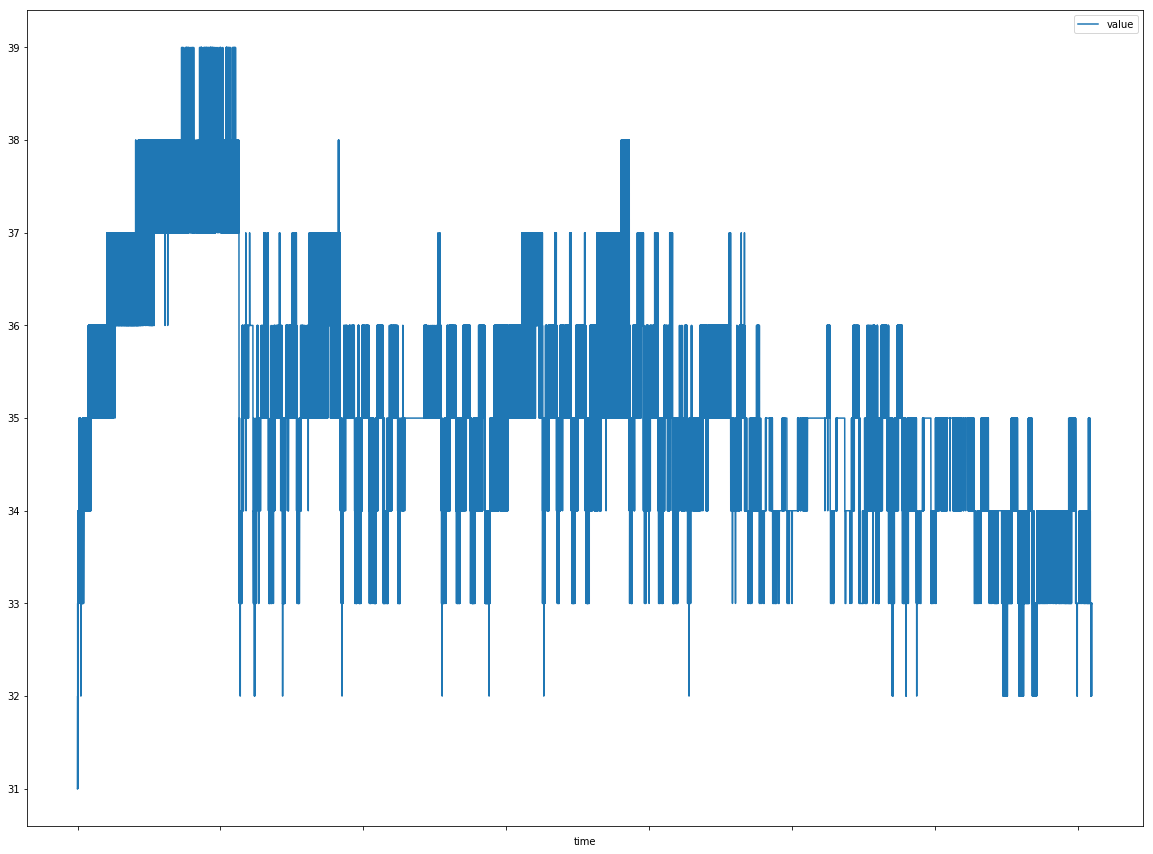

In [31]:
df[df.sensor == 'H-DHT11'].plot()